# 01 Importing Libraries

In [1]:
import sys  
!{sys.executable} -m pip install --user scikit-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02 Import Data

In [5]:
path = r'C:\Users\isava\OneDrive\Documents\CareerFoundry\Data Immersion\AdvancedAnalytics\WorldRiskIndex'

In [7]:
df = pd.read_csv(os.path.join(path,'02 Data','CleanedData', 'world_risk_index_cleaned.csv'))

In [17]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippines,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Solomon Islands,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


# 03 Data Prep for Regression Analysis

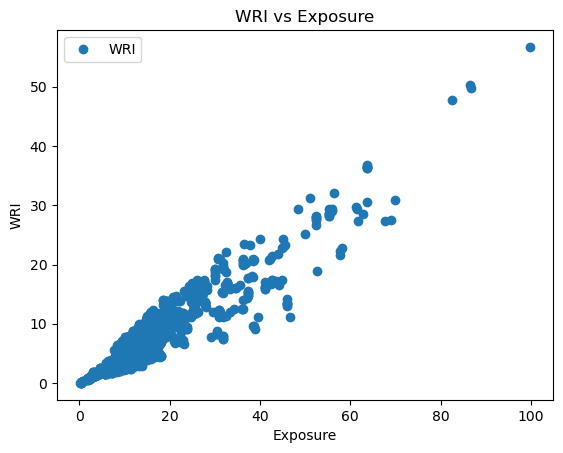

In [10]:
df.plot(x = 'Exposure', y='WRI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('WRI vs Exposure')  
plt.xlabel('Exposure')  
plt.ylabel('WRI')  
plt.show()

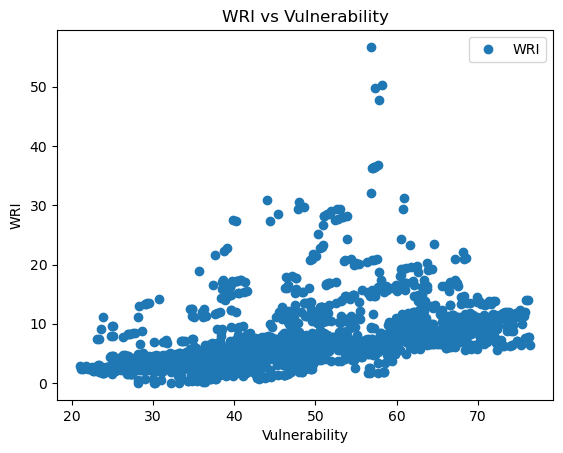

In [12]:
df.plot(x = 'Vulnerability', y='WRI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('WRI vs Vulnerability')  
plt.xlabel('Vulnerability')  
plt.ylabel('WRI')  
plt.show()

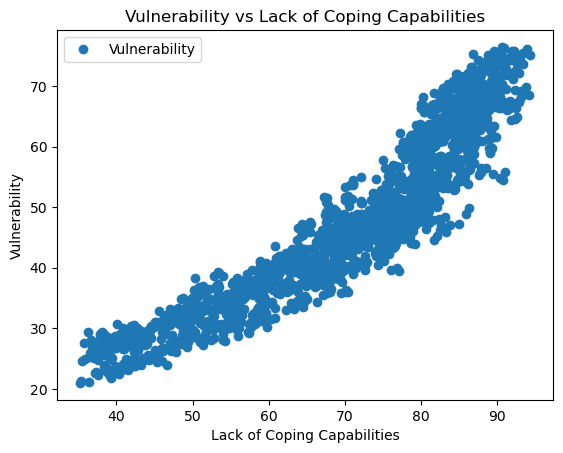

In [14]:
df.plot(x = 'Lack of Coping Capabilities', y='Vulnerability',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Vulnerability vs Lack of Coping Capabilities')  
plt.xlabel('Lack of Coping Capabilities')  
plt.ylabel('Vulnerability')  
plt.show()

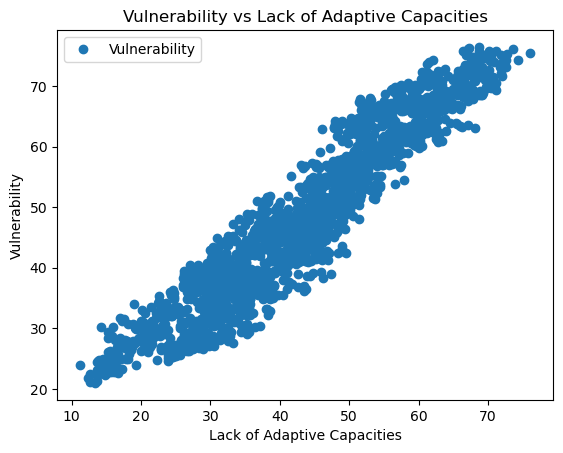

In [16]:
df.plot(x = 'Lack of Adaptive Capacities', y='Vulnerability',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Vulnerability vs Lack of Adaptive Capacities')  
plt.xlabel('Lack of Adaptive Capacities')  
plt.ylabel('Vulnerability')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

WRI = df['WRI'].values.reshape(-1,1)
Exp = df['Exposure'].values.reshape(-1,1)
Vulnerability = df['Vulnerability'].values.reshape(-1,1)
Coping = df['Lack of Coping Capabilities'].values.reshape(-1,1)
Adapt = df['Lack of Adaptive Capacities'].values.reshape(-1,1)


In [41]:
# Split data into a training set and a test set.

Exp_train, Exp_test, WRI_train, WRI_test = train_test_split(Exp, WRI, test_size=0.3, random_state=0)
V_train, V_test, WRI_V_train, WRI_V_test = train_test_split(Vulnerability, WRI, test_size=0.3, random_state=0)

# 04 Regression

## Hypothesis

Exposure and Vulnerability both have positive relationship with WRI.

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

### WRI vs Exposure

In [27]:
# Fit the regression object onto the training set.

regression.fit(Exp_train, WRI_train)

LinearRegression()

In [29]:
WRI_predicted = regression.predict(Exp_test)

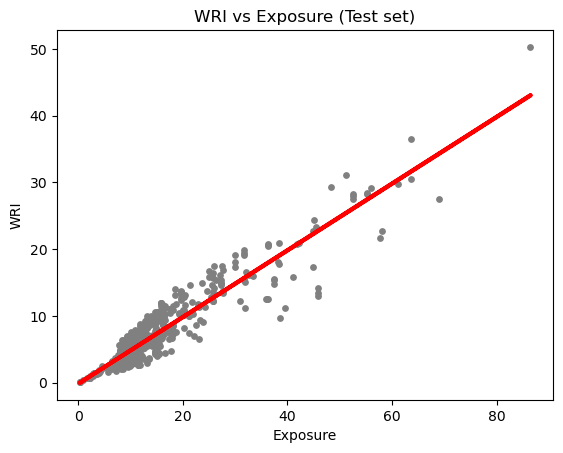

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Exp_test, WRI_test, color='gray', s = 15)
plot_test.plot(Exp_test, WRI_predicted, color='red', linewidth =3)
plot_test.title('WRI vs Exposure (Test set)')
plot_test.xlabel('Exposure')
plot_test.ylabel('WRI')
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(WRI_test, WRI_predicted) # This is the mean squared error
r2 = r2_score(WRI_test, WRI_predicted) # This is the R2 score.

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18260569]]
Mean squared error:  4.924846393844894
R2 score:  0.8471237810950595


This fits well. The MSE is relatively low and about the model explains about 82% of the variation in the data. As exposure increases the WRI of a country increases.

### WRI vs Vulnerability

In [43]:
regression.fit(V_train, WRI_V_train)
WRI_V_predicted = regression.predict(V_test)


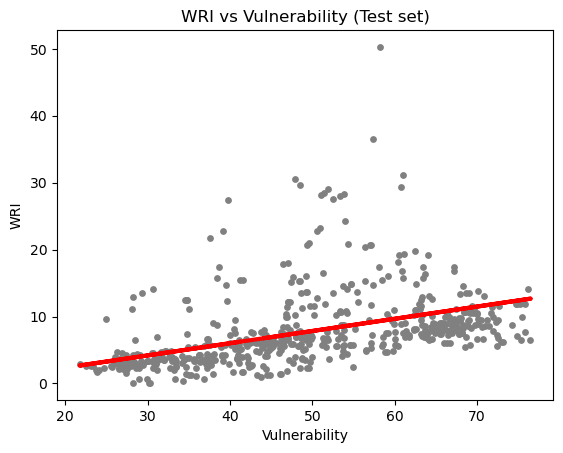

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(V_test, WRI_V_test, color='gray', s = 15)
plot_test.plot(V_test, WRI_V_predicted, color='red', linewidth =3)
plot_test.title('WRI vs Vulnerability (Test set)')
plot_test.xlabel('Vulnerability')
plot_test.ylabel('WRI')
plot_test.show()

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(WRI_V_test, WRI_V_predicted) # This is the mean squared error
r2 = r2_score(WRI_V_test, WRI_V_predicted) # This is the R2 score.

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18260569]]
Mean squared error:  26.65174409784146
R2 score:  0.1726812292070059


This doesnt quite fit as expected. There are some outliers that need to be assessed. The error is fairly large indicating that a linear model may not be the best fit for the Vulnerability variable. The $R^2$ variable also indicates that this is not a good fit by indicating that only about 17% of the variation is covered by the linear model.

By visually looking at the scatterplot I can see that there does seem to be a positive relationship when WRI values are low. As the WRI increases the Vulnerability levels are more scattered. This explains the highe MSE and low $R^2$ value.

In [67]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': WRI_V_test.flatten(), 'Predicted': WRI_V_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.25,6.778936
1,3.47,7.310319
2,6.80,8.080915
3,7.46,10.697654
4,3.67,7.606140
5,9.44,11.303905
6,4.23,3.712987
7,4.92,9.019508
8,3.08,3.672814
9,7.17,8.473517


# 05 Discussion

In [78]:
df[df['WRI'] > 50]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1039,Vanuatu,56.71,99.88,56.78,35.32,84.36,50.66,2019,Very High,Very High,High,High
1573,Vanuatu,50.28,86.46,58.15,36.07,86.37,52.00,2018,Very High,Very High,High,High


There are some clear outliers in my dataset but I dont feel justified to remove them. One of the most extreme outliers is Vanuatu which marks high in all the categories. Vanuatu is a small island located in Oceania. It is one of the highest risks regions and faces "natural hazards confronted by Vanuatu include cyclones, volcanic eruptions, floods, earthquakes, tsunamis, droughts, and sea level rise" (United Nations, n.d.). This outlier is corobborated by credible sources therefore I do not want to remove it from the dataset at this time. 

In [80]:
df[df['WRI'] > 20]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippines,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Solomon Islands,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1578,Papua New Guinea,20.88,31.05,67.24,55.58,83.80,62.35,2018,Very High,Very High,Very High,Very High
1579,Guatemala,20.60,38.50,53.50,32.98,81.35,46.17,2018,Very High,Very High,High,High
1745,Vanuatu,36.28,63.66,56.99,34.90,81.16,54.90,2016,Very High,Very High,High,High
1746,Tonga,29.33,55.27,53.08,28.66,81.80,48.76,2016,Very High,Very High,High,Medium


The other islands are also smaller Islands that are expected to have high WRI scores.

In [71]:
df.shape

(1915, 12)

#### Limitations

- My dataset only contains 1915 observations. This may not be a large enough data set to build a regression analysis.

### Linear Model

I belive that a multiple regression model would best fit my data. There are many factors that go into determining the risk score for a country. I belive that measuring just on exposure or vulnerability is not a comprehensive enough model to determine risk. While Exposure does seem to be a relatively strong predictor for WRI there is some positive correlation involving vulnerability as well. 